In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import statsmodels.api as sm
from PreproccessingCv import X, y

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

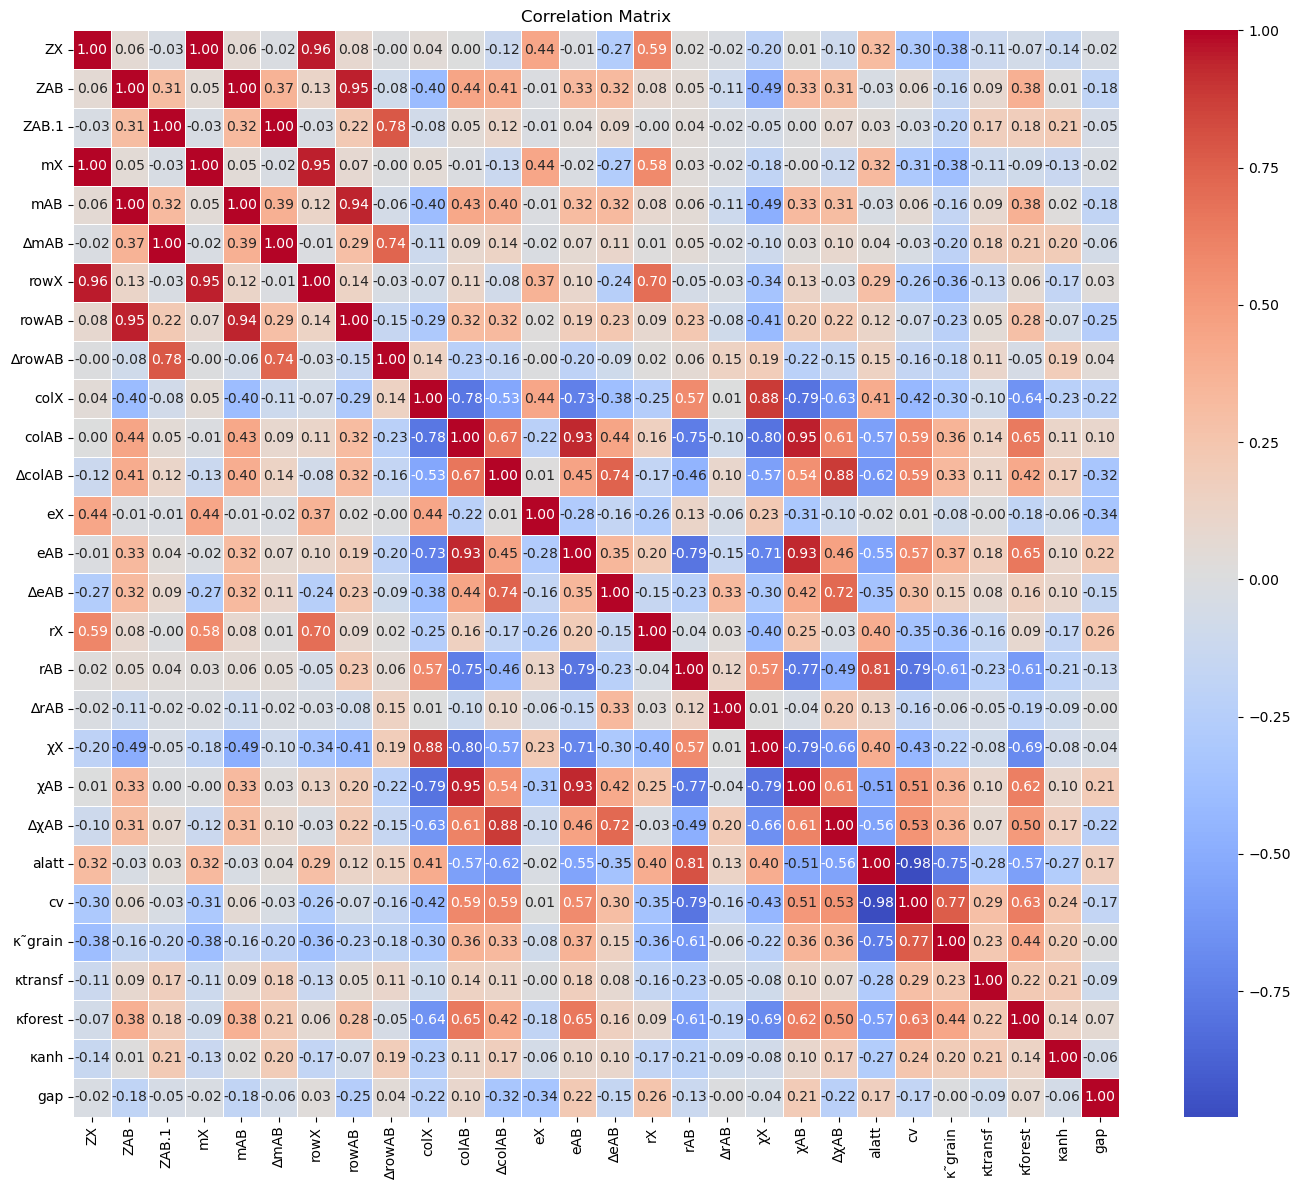

In [3]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
heatmap.figure.savefig('correlation_matrix.png', dpi = 600)
plt.show()

In [11]:
# g = sns.PairGrid(df)
# g.map_diag(sns.histplot)  
# g.map_offdiag(sns.scatterplot) 
# plt.show()

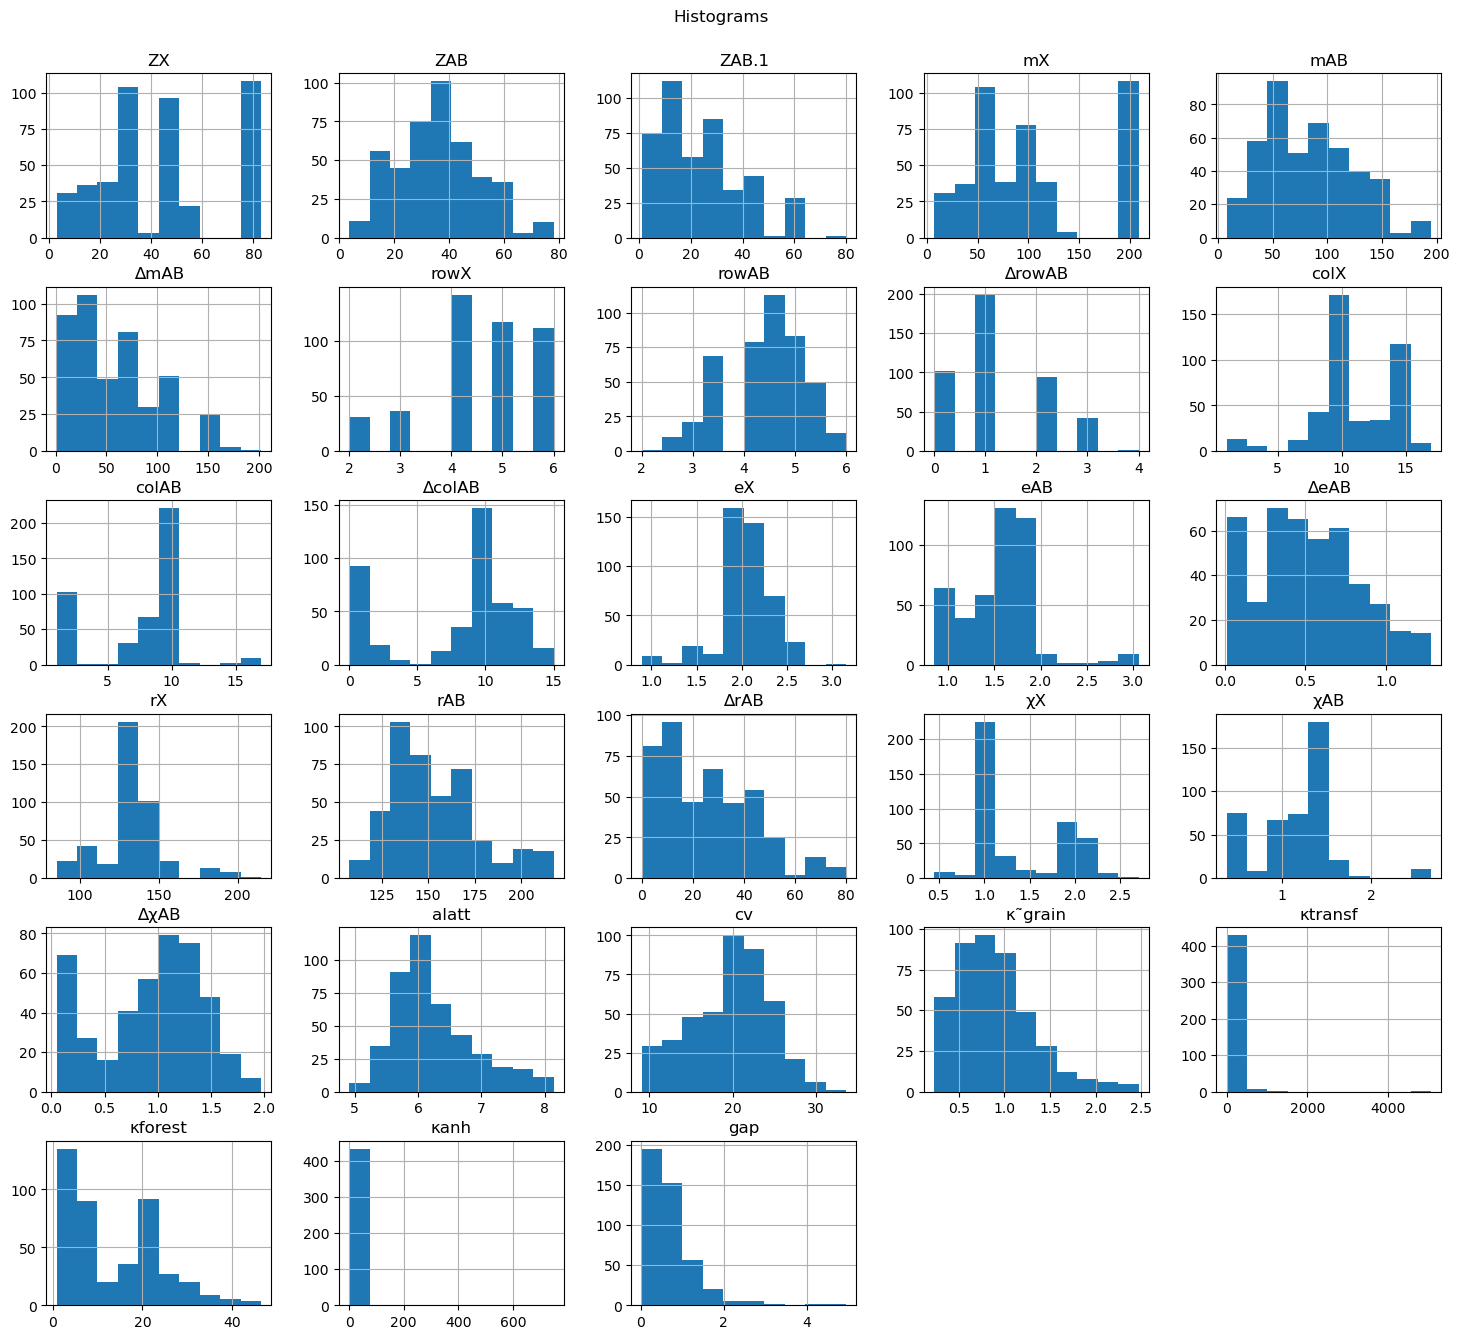

In [5]:
# Histogram
df.hist(figsize=(18, 16))
plt.suptitle('Histograms', x=0.5, y=0.92)
plt.savefig('histogram.png', dpi = 600)
plt.show()

In [6]:
models = {
  "model1": "AdaBoostCv.pkl",
  "model2": "DecisionTreesCv.pkl",
  "model3": "ExtraTreesCv.pkl",
  "model4": "GPRCv.pkl",
  "model5": "stacked_Cv_model.pkl"
}

In [7]:
loaded_models = {}
for name, filename in models.items():
  with open(filename, "rb") as f:
    loaded_models[name] = pickle.load(f)

print("Models loaded successfully!")

Models loaded successfully!


In [8]:
with open("best_base_models.pkl", "rb") as f:
  loaded_best_base_models = pickle.load(f)

In [ ]:
pred_AdaBoostCv = loaded_models["model1"].predict(X_test)
pred_DecicionTreesCv = loaded_models["model2"].predict(X_test)
pred_ExtraTreesCv = loaded_models["model3"].predict(X_test)
pred_GPRCv = loaded_models["model4"].predict(X_test)
base_preds1 = loaded_best_base_models['random_forest'].predict(X_test)
base_preds2 = loaded_best_base_models['gradient_boosting'].predict(X_test)
stacked_data = np.array([base_preds1, base_preds2]).T
pred_stackedCv = loaded_models["model5"].predict(stacked_data)

In [ ]:
r2_scores = {}
mse_scores = {}
mae_scores = {}

models = {
    "AdaBoost": pred_AdaBoostCv,
    "DecisionTrees": pred_DecicionTreesCv,
    "ExtraTrees": pred_ExtraTreesCv,
    "GaussianProcess": pred_GPRCv,
    "Stacked": pred_stackedCv
}

for model_name, predictions in models.items():
    r2_scores[model_name] = r2_score(y_test, predictions)
    mse_scores[model_name] = mean_squared_error(y_test, predictions, squared=True)
    mae_scores[model_name] = mean_absolute_error(y_test, predictions)

print("R-squared Scores:")
for model_name, score in r2_scores.items():
    print(f"{model_name}: {score}")

print("\nMean Squared Errors:")
for model_name, score in mse_scores.items():
    print(f"{model_name}: {score}")

print("\nMean Absolute Errors:")
for model_name, score in mae_scores.items():
    print(f"{model_name}: {score}")


R-squared Scores:
AdaBoost: 0.9760678619803863
DecisionTrees: 0.9047611421793846
ExtraTrees: 0.9843786592287267
GaussianProcess: 0.9816715418079035
Stacked: 0.9875908969820156

Mean Squared Errors:
AdaBoost: 0.028365841784724163
DecisionTrees: 0.11288295138877129
ExtraTrees: 0.018515373779812053
GaussianProcess: 0.021724015832135565
Stacked: 0.014708032045027025

Mean Absolute Errors:
AdaBoost: 0.09311694534832604
DecisionTrees: 0.22967941009101678
ExtraTrees: 0.06250458518512068
GaussianProcess: 0.10507861252904625
Stacked: 0.051321480984882116


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

In [ ]:
results_df = pd.DataFrame({
    "Model": list(models.keys()),
    "R-squared Score": list(r2_scores.values()),
    "Mean Squared Error": list(mse_scores.values()),
    "Mean Absolute Error": list(mae_scores.values())
})

print(results_df)


             Model  R-squared Score  Mean Squared Error  Mean Absolute Error
0         AdaBoost         0.976068            0.028366             0.093117
1    DecisionTrees         0.904761            0.112883             0.229679
2       ExtraTrees         0.984379            0.018515             0.062505
3  GaussianProcess         0.981672            0.021724             0.105079
4          Stacked         0.987591            0.014708             0.051321


In [ ]:
results_df.to_csv("model_performance_results.csv", index=False)

In [ ]:
print(results_df)

             Model  R-squared Score  Mean Squared Error  Mean Absolute Error
0         AdaBoost         0.976068            0.028366             0.093117
1    DecisionTrees         0.904761            0.112883             0.229679
2       ExtraTrees         0.984379            0.018515             0.062505
3  GaussianProcess         0.981672            0.021724             0.105079
4          Stacked         0.987591            0.014708             0.051321


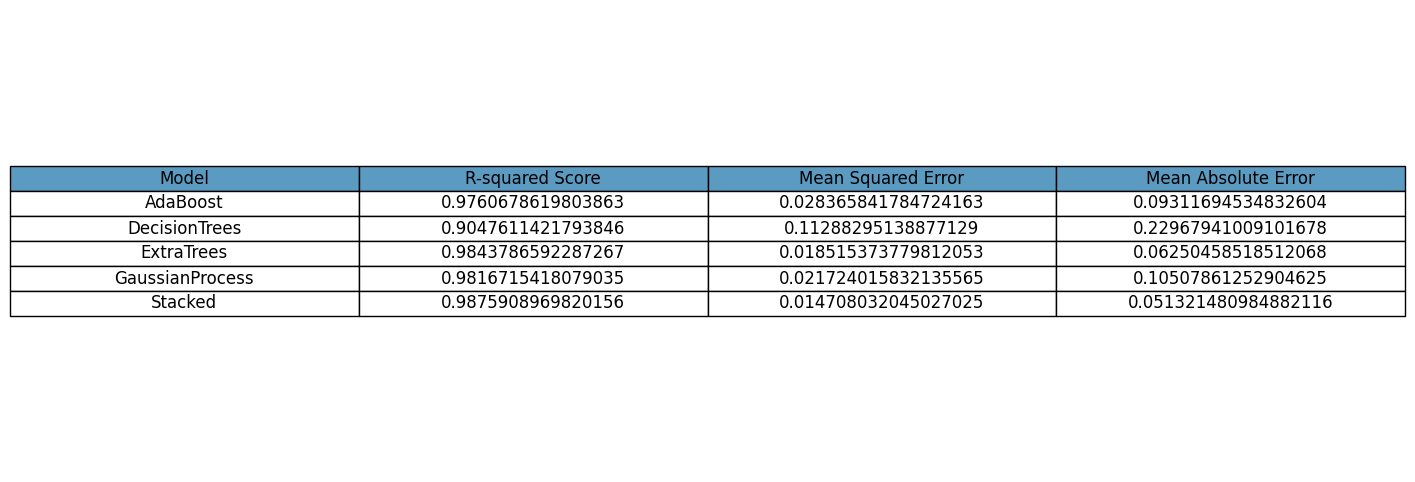

In [ ]:
plt.figure(figsize=(12, 6)) 
plt.axis('off')
header_color = '#5C9BC1'
cell_colors = [[header_color for _ in range(len(results_df.columns))]]
cell_colors[0] = ['#FFFFFF' for _ in range(len(results_df.columns))]
font_size = 12  
cell_text_size = 10  

table = plt.table(cellText=results_df.values,
                  colLabels=results_df.columns,
                  colColours=[header_color] * len(results_df.columns),
                  cellColours=cell_colors * len(results_df),  # Extend to match the number of rows
                  cellLoc='center',
                  loc='center',
                  fontsize=cell_text_size)

table.scale(1.5, 1.5)  
table.auto_set_font_size(False)
table.set_fontsize(font_size)
plt.savefig("model_performance_results.png", bbox_inches='tight', dpi=600)
plt.show()

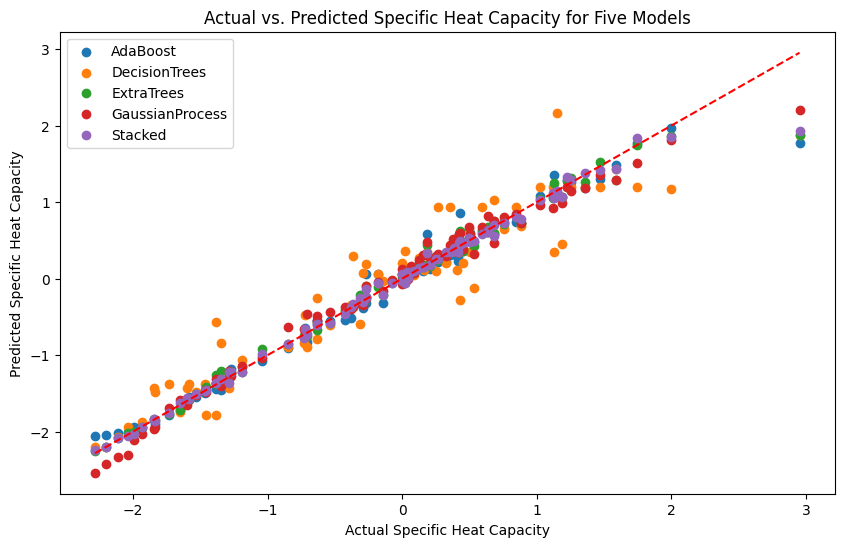

In [ ]:
actual_values = y_test.values 
predicted_values = {
    "AdaBoost": pred_AdaBoostCv,
    "DecisionTrees": pred_DecicionTreesCv,
    "ExtraTrees": pred_ExtraTreesCv,
    "GaussianProcess": pred_GPRCv,
    "Stacked": pred_stackedCv
}

plt.figure(figsize=(10, 6))
for model_name, preds in predicted_values.items():
    plt.scatter(actual_values, preds, label=model_name)

min_value = min(np.min(actual_values), np.min(preds))
max_value = max(np.max(actual_values), np.max(preds))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--')

plt.xlabel('Actual Specific Heat Capacity')
plt.ylabel('Predicted Specific Heat Capacity')
plt.title('Actual vs. Predicted Specific Heat Capacity for Five Models')
plt.legend()
# plt.grid(True)
plt.savefig("actual_vs_predicted_scatter_with_reference_line.png", bbox_inches='tight', dpi=600)
plt.show()

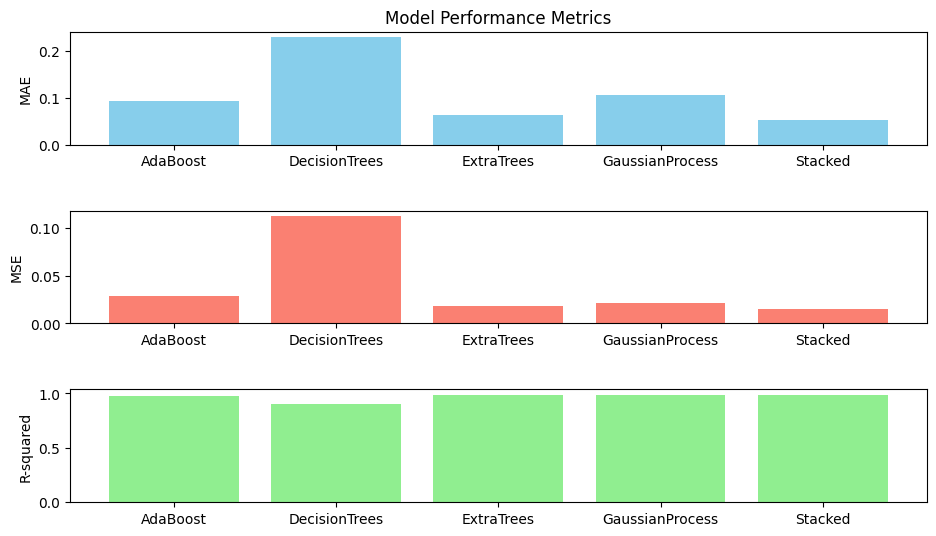

In [ ]:
models = ['AdaBoost', 'DecisionTrees','ExtraTrees' ,'GaussianProcess', 'Stacked']
plt.figure(figsize=(10, 6))

# Bar plot for MAE
plt.subplot(3, 1, 1)
plt.bar(models, mae_scores.values(), color='skyblue')
plt.ylabel('MAE')
plt.title('Model Performance Metrics')

# Bar plot for MSE
plt.subplot(3, 1, 2)
plt.bar(models, mse_scores.values(), color='salmon')
plt.ylabel('MSE')

# Bar plot for R-squared
plt.subplot(3, 1, 3)
plt.bar(models, r2_scores.values(), color='lightgreen')
plt.ylabel('R-squared')
plt.tight_layout(pad=3.0)
plt.savefig("BarplotR2_mae_mse.png", dpi = 600)
plt.show()


In [ ]:
y_test_reshaped = np.squeeze(y_test)

residuals_AdaBoost = y_test_reshaped - pred_AdaBoostCv
residuals_DecisionTrees = y_test_reshaped - pred_DecicionTreesCv
residuals_ExtraTrees = y_test_reshaped - pred_ExtraTreesCv
residuals_GaussianProcess = y_test_reshaped - pred_GPRCv
residuals_Stacked = y_test_reshaped - pred_stackedCv

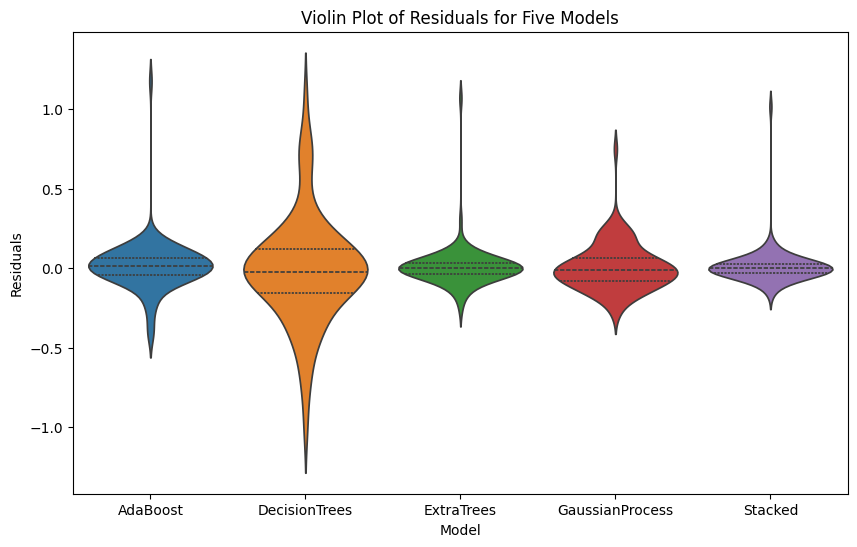

In [ ]:
residuals_model1 = residuals_AdaBoost.values
residuals_model2 = residuals_DecisionTrees.values
residuals_model3 = residuals_ExtraTrees.values
residuals_model4 = residuals_GaussianProcess.values
residuals_model5 = residuals_Stacked.values

all_residuals = [residuals_model1, residuals_model2, residuals_model3, residuals_model4, residuals_model5]
model_names = ['AdaBoost', 'DecisionTrees', 'ExtraTrees', 'GaussianProcess', 'Stacked']

plt.figure(figsize=(10, 6))
sns.violinplot(data=all_residuals, inner="quartile")
plt.xlabel('Model')
plt.ylabel('Residuals')
plt.title('Violin Plot of Residuals for Five Models')
plt.xticks(np.arange(len(model_names)), model_names)
# plt.grid(True)
plt.savefig("ResidualsViolin.png", dpi = 600)
plt.show()


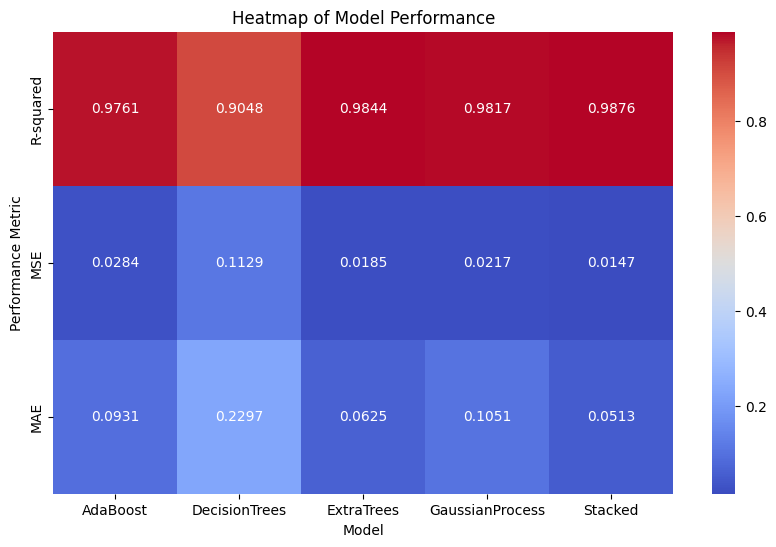

In [ ]:
r2_scores = {'AdaBoost': 0.9760678619803863,
             'DecisionTrees': 0.9047611421793846,
             'ExtraTrees': 0.9843786592287267,
             'GaussianProcess': 0.9816715418079035,
             'Stacked': 0.9875908969820156}

mse_scores = {'AdaBoost': 0.028365841784724163,
              'DecisionTrees': 0.11288295138877129,
              'ExtraTrees': 0.018515373779812053,
              'GaussianProcess': 0.021724015832135565,
              'Stacked': 0.014708032045027025}

mae_scores = {'AdaBoost': 0.09311694534832604,
              'DecisionTrees': 0.22967941009101678,
              'ExtraTrees': 0.06250458518512068,
              'GaussianProcess': 0.10507861252904625,
              'Stacked': 0.051321480984882116}

data = np.array([[r2_scores[model] for model in r2_scores.keys()],
                 [mse_scores[model] for model in mse_scores.keys()],
                 [mae_scores[model] for model in mae_scores.keys()]])

performance_metrics = ['R-squared', 'MSE', 'MAE']
models = list(r2_scores.keys())

plt.figure(figsize=(10, 6))
sns.heatmap(data, annot=True, fmt=".4f", cmap='coolwarm', xticklabels=models, yticklabels=performance_metrics)
plt.xlabel('Model')
plt.ylabel('Performance Metric')
plt.title('Heatmap of Model Performance')
plt.savefig("HeatmapPerformace.png", dpi = 600)
plt.show()


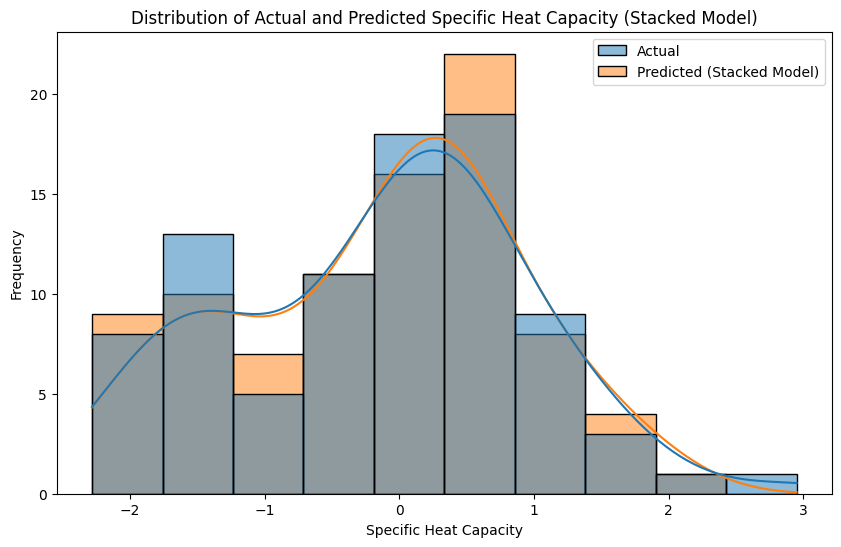

In [ ]:
df = pd.DataFrame({'Actual': y_test["cv"].values, 'Predicted (Stacked Model)': pred_stackedCv})
plt.figure(figsize=(10, 6))
sns.histplot(data=df, kde=True)
plt.xlabel('Specific Heat Capacity')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Specific Heat Capacity (Stacked Model)')
plt.savefig("Distplotstacked.png", dpi=600)
plt.show()

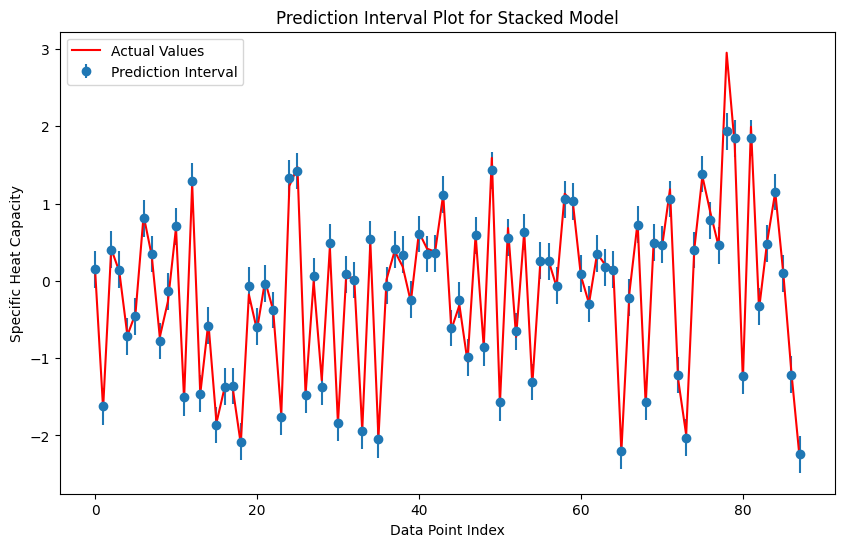

In [ ]:
prediction_interval = 1.96 * np.std(residuals_Stacked)  # Assuming a 95% prediction interval

plt.figure(figsize=(10, 6))
plt.errorbar(range(len(y_test_reshaped)), pred_stackedCv, yerr=prediction_interval, fmt='o', label='Prediction Interval')
plt.plot(range(len(y_test_reshaped)), y_test_reshaped, 'r-', label='Actual Values')
plt.xlabel('Data Point Index')
plt.ylabel('Specific Heat Capacity')
plt.title('Prediction Interval Plot for Stacked Model')
plt.legend()
# plt.grid(True)
plt.savefig("PredictionIntervalStacked.png",dpi=600)
plt.show()

In [18]:
df = df[[ 'ZX', 'ZAB', 'ZAB.1', 'mX', 'mAB', '∆mAB', 'rowX', 'rowAB', '∆rowAB',
       'colX', 'colAB', '∆colAB', 'eX', 'eAB', '∆eAB', 'rX', 'rAB', '∆rAB',
       'χX', 'χAB', '∆χAB', 'alatt', 'cv', 'κ˜grain',
       'κtransf', 'κforest', 'κanh','gap']]

In [19]:
def is_target(col):
   if col.startswith("cv"):
       return True
   else:
       return False

info = df.info()
memory_usage = df.memory_usage(deep=True)

summary_dict = {
    "Shape": df.shape,
    "Data Type Counts": memory_usage,
    "Target Variables": [col for col in df.columns if is_target(col)],
    "Description": df.describe(include='all')
}
summary_dict["Features"] = [col for col in df.columns if col not in summary_dict["Target Variables"]]
summary_dict

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 446
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ZX       438 non-null    float64
 1   ZAB      438 non-null    float64
 2   ZAB.1    438 non-null    float64
 3   mX       438 non-null    float64
 4   mAB      438 non-null    float64
 5   ∆mAB     438 non-null    float64
 6   rowX     438 non-null    float64
 7   rowAB    438 non-null    float64
 8   ∆rowAB   438 non-null    float64
 9   colX     438 non-null    float64
 10  colAB    438 non-null    float64
 11  ∆colAB   438 non-null    float64
 12  eX       438 non-null    float64
 13  eAB      438 non-null    float64
 14  ∆eAB     438 non-null    float64
 15  rX       438 non-null    float64
 16  rAB      438 non-null    float64
 17  ∆rAB     438 non-null    float64
 18  χX       438 non-null    float64
 19  χAB      438 non-null    float64
 20  ∆χAB     438 non-null    float64
 21  alatt    438 non

{'Shape': (438, 28),
 'Data Type Counts': Index      3504
 ZX         3504
 ZAB        3504
 ZAB.1      3504
 mX         3504
 mAB        3504
 ∆mAB       3504
 rowX       3504
 rowAB      3504
 ∆rowAB     3504
 colX       3504
 colAB      3504
 ∆colAB     3504
 eX         3504
 eAB        3504
 ∆eAB       3504
 rX         3504
 rAB        3504
 ∆rAB       3504
 χX         3504
 χAB        3504
 ∆χAB       3504
 alatt      3504
 cv         3504
 κ˜grain    3504
 κtransf    3504
 κforest    3504
 κanh       3504
 gap        3504
 dtype: int64,
 'Target Variables': ['cv'],
 'Description':                ZX         ZAB       ZAB.1          mX         mAB        ∆mAB  \
 count  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000   
 mean    43.191781   35.757991   22.958904  102.372922   83.586895   58.346461   
 std     23.929334   15.614627   15.825656   62.399617   40.037376   41.638506   
 min      3.000000    3.500000    1.000000    6.940000    7.980000    0.940000 

In [13]:
from sklearn.inspection import permutation_importance

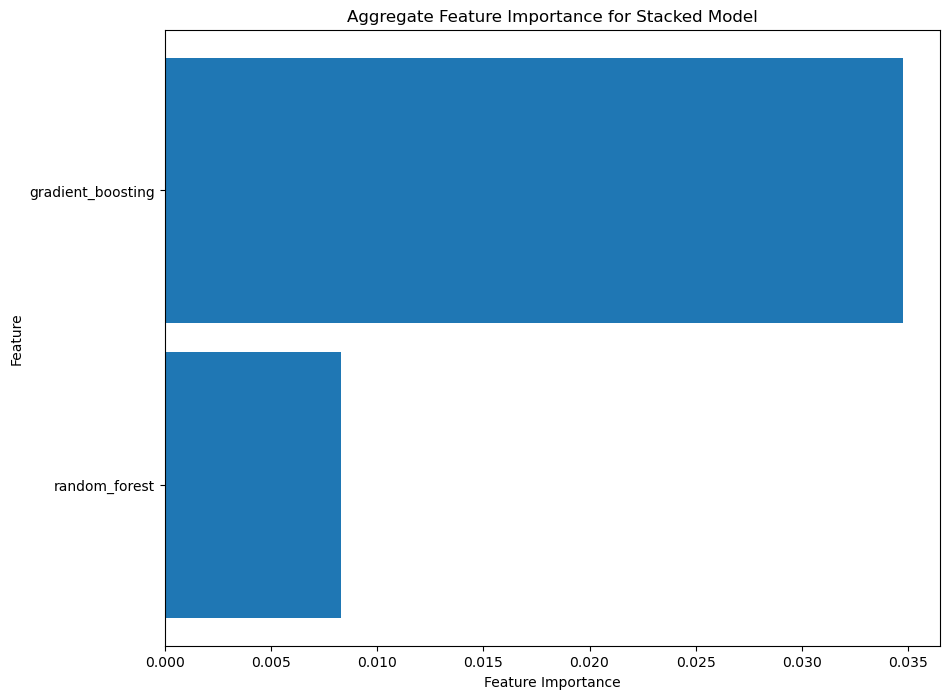

In [21]:
num_features = len(loaded_best_base_models)
feature_importance_agg = np.zeros(num_features)

for i, (model_name, model) in enumerate(loaded_best_base_models.items()):
    result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
    feature_importance_base = result.importances_mean
    feature_importance_mean = np.mean(feature_importance_base)
    feature_importance_agg[i] = feature_importance_mean
feature_importance_agg /= num_features

plt.figure(figsize=(10, 8))
plt.barh(range(num_features), feature_importance_agg, align='center',height=0.9)
plt.yticks(range(num_features), list(loaded_best_base_models.keys()))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Aggregate Feature Importance for Stacked Model')
plt.show()

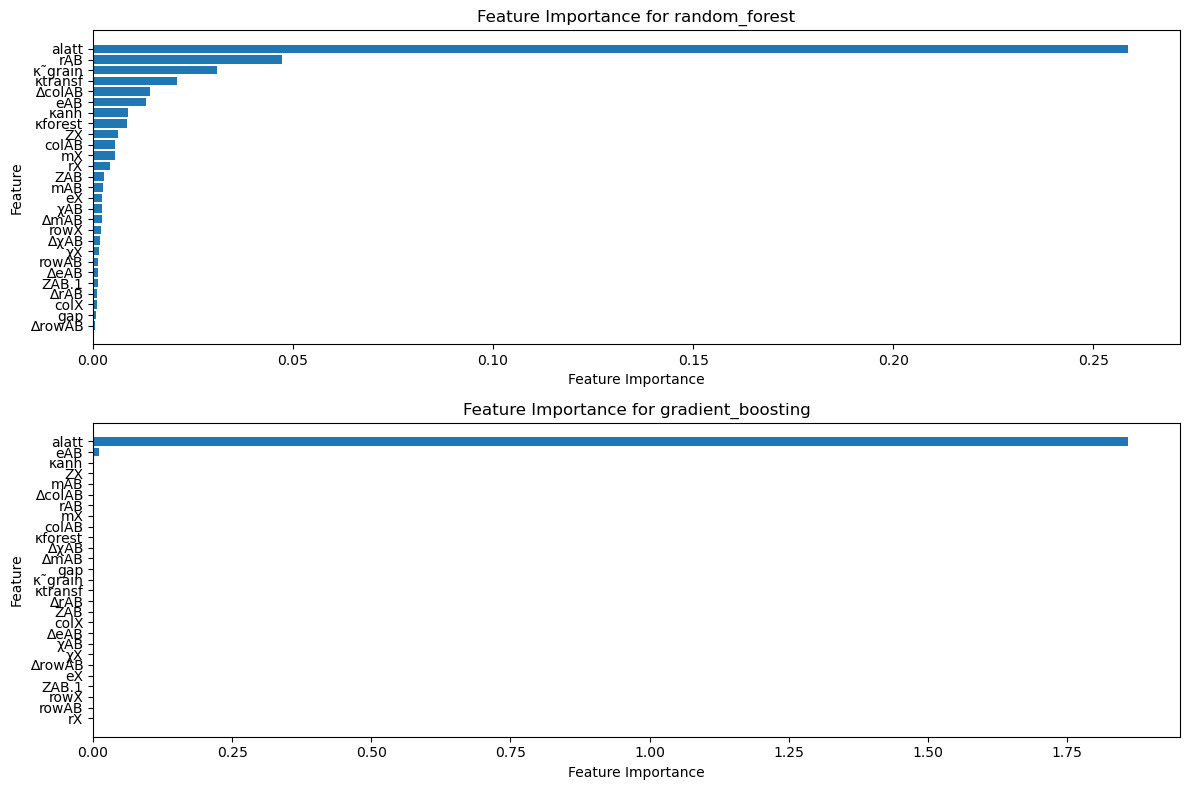

In [35]:
feature_names = X.columns.tolist()
num_features = len(feature_names)
plt.figure(figsize=(12, 8))
for i, (model_name, model) in enumerate(loaded_best_base_models.items(), start=1):
    result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
    feature_importance = result.importances_mean
    feature_importance = feature_importance[-num_features:]
    sorted_idx = np.argsort(feature_importance)
    feature_importance = feature_importance[sorted_idx]
    feature_names_subset = [feature_names[idx] for idx in sorted_idx]
    
    plt.subplot(len(loaded_best_base_models), 1, i)
    plt.barh(range(num_features), feature_importance, align='center')
    plt.yticks(range(num_features), feature_names_subset)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance for {model_name}')
#     plt.grid(True)

plt.tight_layout()
plt.savefig('featuresBases.png',dpi=600)
plt.show()


In [37]:
num_features = len(loaded_best_base_models)

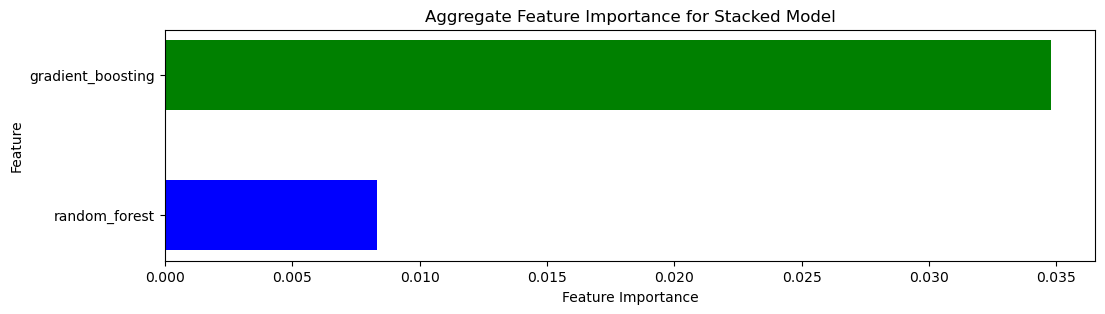

In [62]:
# Plot feature importance
plt.figure(figsize=(12, 3))
plt.barh(range(num_features), feature_importance_agg, align='center', height=0.5, color=colors)
plt.yticks(range(num_features), list(loaded_best_base_models.keys()))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Aggregate Feature Importance for Stacked Model')
plt.savefig('FeaturesImp_StackedCV.png',dpi=600)
plt.show()

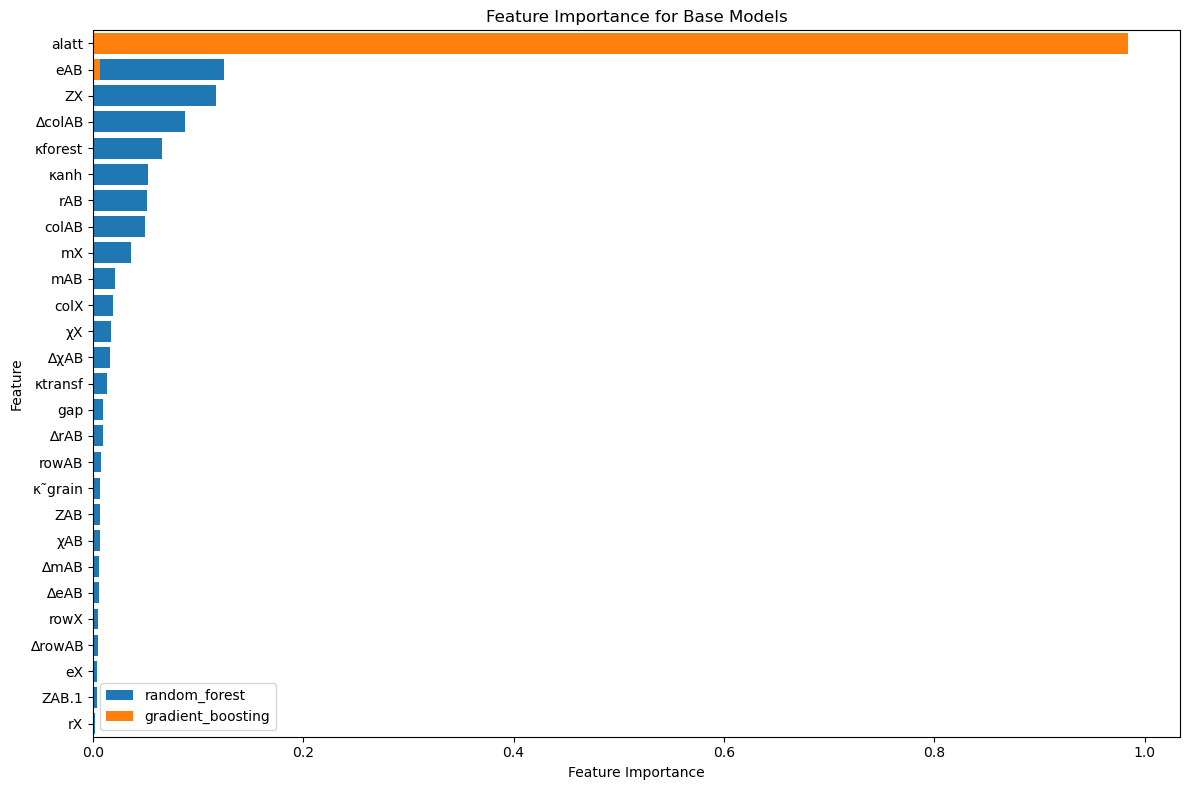

In [64]:
feature_names = X.columns.tolist()
num_features = len(feature_names)
base_model_feature_importance = {}

for model_name, model in loaded_best_base_models.items():
    feature_importance = model.feature_importances_ 
    base_model_feature_importance[model_name] = feature_importance

plt.figure(figsize=(12, 8))
for model_name, feature_importance in base_model_feature_importance.items():
    sorted_idx = np.argsort(feature_importance)
    plt.barh(range(len(feature_names)), feature_importance[sorted_idx], align='center', label=model_name)
    
plt.yticks(range(len(feature_names)), [feature_names[idx] for idx in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Base Models')
plt.legend()
plt.ylim(-0.5, num_features - 0.5)
plt.savefig('FeatureImpBaseModelsCv.png', dpi = 600)
plt.tight_layout()
plt.show()